# <center> Econ 590: Quantitative Economics (with Python) </center>
## <center> Homework 4 (Group)</center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .py file and name it as **username_hw4.py**, where username is the username of the group member who submits the homework. 
    - If you work in Jupyter notebook -- you can export it via 'File -> Downloaded As -> Python (.py)' option in the menu bar or copy and paste the code into a blank .py file. **In either case you should remove any test cells/code that is outside of functions.**
    - Submit only username_hw4.py file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    
- We will run your code using the following code (assuming that your file is in the current working directory):

```python 
from importlib import import_module
m=import_module('username_hw4')
m.q#(args)
```

Grading: Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [1]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

In [2]:
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd


'C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\ECON590\\HW4'

# Question 1
Modify the **State class** discussed in the lecture to enable an addition of two state objects so that the resulting object's demand and supply curves represent the aggregate demand and supply for the two states. Then, assuming that supply and demand functions are of the form discussed in class (i.e., linear), write a function called **q1** to create a plot with three subfigures: (i) Supply-Demand Model For State 1, (ii) Supply-Demand Model For State 2, (iii) Supply-Demand For The Aggregate Economy (consisting of two states).

- **Input**: none
- **Output**: a pdf figure saved to file username_hw4_q1.pdf (saved to the output folder)

Each figure should be in the following format: 
<center><img src='img/hw6q1image.png'></center>
*Each figure should including all of the relevant information (i.e., labels, equilibrium lines)*

In [3]:
class State:

    def __init__(self, name, sIntercept=0,sSlope=1,dIntercept=100,dSlope=-1):
        self.name = name
        
        #supply function parameters
        self.supply_intercept=sIntercept
        self.supply_slope=sSlope
        
        #demand function parameters
        self.demand_intercept=dIntercept
        self.demand_slope=dSlope
        
    def supply(self, price):
        '''Determine quantity supplied at a given price.'''
        qs = self.supply_intercept + self.supply_slope * price
        return qs
    
    def demand(self,price):
        '''Determine quantity demanded at a given price.'''
        qd = self.demand_intercept + self.demand_slope * price
        return qd

        
    def plot(self,ax=None):  # here ax is an argument of plot, this is convenient for creating a subplot in the future
        '''Plot'''
        p = np.linspace(0,100,101)  
        #find equilibrium price
        for i in p:
            if self.supply(i)==self.demand(i):
                
                equPrice=i
                equQuantity=self.supply(i)
                break
        print(equPrice,equQuantity)
        
        if ax==None:  # if ax is None, we create a subplots inside of this function
            fig,ax=plt.subplots()
        
        ax.plot(self.supply(p),p,'-r',label='supply')
        ax.plot(self.demand(p),p,'-b',label='demand')
        #set vertical and horizontal dashed line of equilibrium point
        ax.hlines(equPrice, 0, equQuantity, linestyle="dashed")
        ax.vlines(equQuantity, 0, equPrice, linestyle="dashed")
        
        #set text on the graph
        ax.annotate('Equilibrium', xy=(equQuantity+2, equPrice), xytext=(equQuantity+15, equPrice),
            arrowprops=dict(facecolor='orange', shrink=0.01),
            )
        ax.annotate('p*', xy=(0, equPrice), xytext=(-10, equPrice),
            )
        ax.annotate('Q*', xy=(equQuantity, 0), xytext=(equQuantity-10, 3),
            )
        # set the range of x and y axes
        ax.set_xlim(0, 220)
        ax.set_ylim(0, 100)
        
        ax.grid(True,linestyle='--')
        
        ax.set_xlabel('Quantity')
        ax.set_ylabel('Price')
        ax.set_title('Supply and Demand: '+self.name)
        ax.legend()
        
        return ax

    def __str__(self):
        return " State: %s"%(self.name)
    
    def __repr__(self):
        return "%s (%.1fm)"%(self.name[:4].upper())
    
    def __add__(self,other):
        #create new subject and set parameters of supply and demand function based on self and other
        newObj_name=self.name+"-"+other.name
        
        New=State(newObj_name,self.supply_intercept+other.supply_intercept,self.supply_slope+other.supply_slope,\
                 self.demand_intercept+other.demand_intercept,self.demand_slope+other.demand_slope)
        return New
    
    def __radd__(self,other):
        newObj_name=other.name+"-"+self.name
        
        New=State(newObj_name,other.supply_intercept+self.supply_intercept,other.supply_slope+self.supply_slope,\
                 other.demand_intercept+self.demand_intercept,other.demand_slope+self.demand_slope)
        return New

In [6]:
def q1():
    #When saving the file to pdf assume that the 'hw6_q1_output' folder already exists
    IN = State('Indiana')
    IL = State('Illinois')
    New=IN+IL
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))

    IN.plot(ax1)
    IL.plot(ax2)
    New.plot(ax3)
   
    fig.savefig("HW4_Output\\q1.pdf")

50.0 50.0
50.0 50.0
50.0 100.0


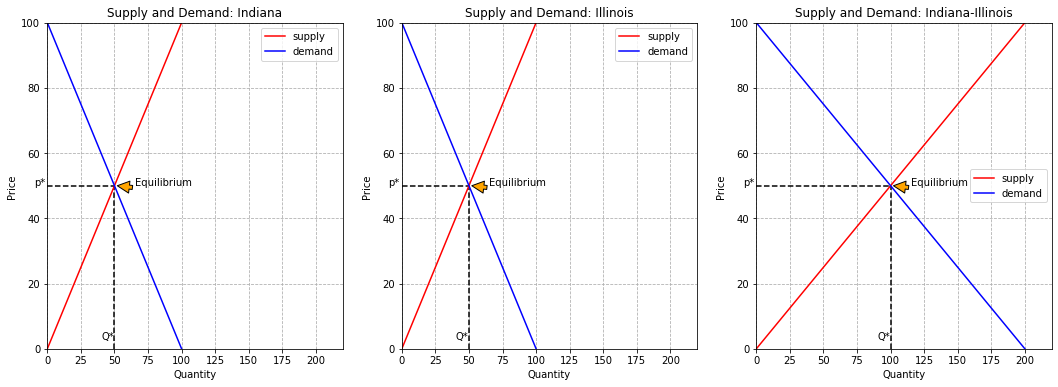

In [7]:
q1()

## Question 2
Suppose you have a random variable X that takes on values {1,2,3,4,5} each with equal probability, and a random variable Y that takes on values {4,5,6,7,9} with probabilities {.2,.1,.5,.1,.1}. Use arrays and array operations to calculate the expected value of X+Y, given that X>1 and Y>5. Write a function called **q2** that takes the two arrays and their probabilty mass functions, performs the calculations, and returns the result.

- **Input**: array X, probability mass function of X (array), array Y, probability mass function of X (array)
- **Output**: floating point number


In [14]:
def q2(X,pmfX,Y,pmfY):


    XM=np.vstack([X,X,X,X,X]).T
    YM=np.vstack([Y,Y,Y,Y,Y])
    
    SUMS=XM+YM
    RelevantSums=SUMS[1:6,2:6]
    

    PROB=np.outer(pmfX,pmfY)
    RelevantPROB=PROB[1:6,2:6]
    
    Renormalize=RelevantPROB/RelevantPROB.sum()

    # expected value of X+Y
    ((XM+YM)*PROB).sum()
    # expected value of X+Y, given that X>1 and Y>5.
    return (RelevantSums*Renormalize).sum()

In [15]:
probX=np.ones(5)/5  
probY=np.array([.2,.1,.5,.1,.1])
x=np.array([1,2,3,4,5])
y=np.array([4,5,6,7,9])


q2(x,probX,y, probY)

10.071428571428571

# Question 3

Write a recursive function called **q3** to convert an integer N to a string representing that integer in arbitrary base B representation, with  1<B<37. 

- **Input**: integers N, B
- **Output**: a string representing the integer N in base B
- **Example**: If you run q3(10,10) the output should be ‘10’. If you run q3(10,16) the output should be ‘A’. If you run q3(10,2) the output should be ‘1010’.

*Hint: In class we wrote a function to convert an integer N to a string representing of base 10.*

In [16]:
# STARTING POINT
def q3(number,base):
    """1<B<37"""
    stringOfDigits="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    #checking if the integer N is less than the base B. If so, return the corresponding representation in that base
    if number<base:
        return stringOfDigits[number]
    
    ##Using recursion to convert the integer N to base B representation. The remainder from the modulo operation is used.
    else:
        return q3(number//base,base) + stringOfDigits[number%base]

In [17]:
print(q3(10,10))
print(q3(10,16))
print(q3(10,2))

10
A
1010


# Question 4
Write a function called **q4** to compare the performance of **in** operator for lists, dictionaries, and arrays. That is, on the x-axis you should have the size of the container (i.e., list, dictionary, array) and on the y-axis you should have the time it takes to check whether an item is in that. 


- **Input**: none
- **Output**: a pdf figure saved to file (submit the figure that you create separately)

*Hint: you will need to create the containers of different sizes*

In [19]:
#STARTING POINT
def measureTime_in(obj,s):
    """measure the time of checking if s is in obj"""
    startTime=time.time()
    if s in obj:
        pass
    endTime=time.time()
    return endTime-startTime

In [20]:
s = 1000000
l = list(range(s)) #create a list of size=s
a = np.arange(s) #create an array of size=s
d = dict.fromkeys(list(range(s)), " ")

print(measureTime_in(l,s))
print(measureTime_in(a,s))
print(measureTime_in(d,s))

0.011998653411865234
0.002289295196533203
0.0


In [21]:
def q4():
    # sizes
    sizes=range(0,5000000,100000)
    inList=[] #Will be saving times for lists
    for s in sizes: #for each size
        l=list(range(s)) #create a list
        inList.append(measureTime_in(l,s))
        
    inArray=[] #Will be saving times for arrays
    for s in sizes: #for each size
        a=np.arange(s) #create an array
        inArray.append(measureTime_in(a,s))
        
        
    inDict=[] #Will be saving times for dictionaries
    for s in sizes:
        d=dict.fromkeys(list(range(s)), " ")
        inDict.append(measureTime_in(d,s))
        
    ds = [inList,inArray,inDict] #these are times that will be displayed
    labs = ['List','Array','Dict'] #labels
    colors = ['red','blue','black'] #colors


    #create the three scatter plots with a loop
    for i,lab in enumerate(labs):
        plt.scatter(sizes, ds[i],color=colors[i], label=labs[i], alpha=.5)

    plt.legend(loc='upper left')
    plt.xlabel('N')
    plt.ylabel('Time (in Seconds)')
    plt.savefig("HW4_Output\\q4.pdf")

q4()  